# Installation

In [ ]:
! pip install openai

In [ ]:
import os
import openai
# Load your API keys

openai.api_key=""
news_api_key = ""

In [ ]:
import os
import openai

response = openai.Completion.create(
    engine="text-davinci-003",
    prompt='Give me a python code to \
    create the logistic map and plot it',
    temperature=0.5,
    max_tokens= 1000,
)
print(response["choices"][0]["text"])



import matplotlib.pyplot as plt 
  
# Logistic Map 
def logistic_map(x, r): 
    return r * x * (1 - x) 
  
# Driver Code 
x = 0.2 # Initial value 
r = 3.8 # Parameter value 
  
# Create a list to store  
# values of x after each iteration 
X_n = [] 
  
# Append the initial value 
# of x to X_n 
X_n.append(x) 
  
# Iterate the logistic map 
# and store the values in X_n 
for i in range(1, 20): 
    x = logistic_map(x, r) 
    X_n.append(x) 
  
# Plot the graph 
plt.plot(X_n, 'o') 
plt.title('Logistic Map') 
plt.xlabel('Number of iterations') 
plt.ylabel('X_n values') 
plt.show()


In [ ]:
response

# Model execution and information generation. Obtaining the data, data preparation and loading

Interaction of LM with external data and tools to generate knowledge. The problems is to predict, explain and relate structural trends in oil prices.

We want the LMs to provide detailed instrucctions and code to select and load the data and define and train the model.  With the model generated we want the LM review the code, generate input-output, review the model, relate to other data, generate conclusions.

Test 1.0. Please give me the code and path to download a historical series of oil prices from a public repository (Kaggle, etc.). We provide two examples.

In [ ]:
import os
import openai

# Load your API key
openai.api_key=""

completion = openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You can write and execute Python code by enclosing it in triple backticks, \
    e.g. ```code goes here```. Use this to run the code and execute the model.\
    The user will provide you with a problem and you have to define a machine learning model with those requirements. \
    You have to define and execute the model step by step. Remember that you have to execute the Python code.\
    In the first step you have to download and load the training data. Use any publicly available oil price dataset from Kaggle, yahoo finance..."},
    {"role": "user", "content":" Please give me the code and path to download a historical series of oil prices from a public repository (Kaggle, etc.)"}
  ]
)

In [ ]:
print(completion.choices[0].message["content"])

Sure! Here is an example of how you can download and load a historical series of oil prices from a public repository using the `pandas_datareader` library and the oil prices dataset from Yahoo Finance.

```python
!pip install pandas_datareader
```

```python
import pandas_datareader as pdr

start_date = "2000-01-01"
end_date = "2021-12-31"

# Download oil prices dataset from Yahoo Finance
oil_prices = pdr.get_data_yahoo("CL=F", start=start_date, end=end_date)

# Save the dataset to a CSV file
oil_prices.to_csv("oil_prices.csv")
```

In the code above, we first install the `pandas_datareader` library using `pip` so that we can download the data from Yahoo Finance.

We then define the `start_date` and `end_date` variables to specify the range of dates for which we want to retrieve the oil prices.

Next, we use the `get_data_yahoo` function from `pandas_datareader` library to download the data for the crude oil futures contract with the ticker symbol "CL=F" from Yahoo Finance.

Finally, w

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yf



start_date = "2000-01-01"
end_date = "2021-12-31"

yf.pdr_override()
# Download oil prices dataset from Yahoo Finance
oil_prices = pdr.get_data_yahoo("CL=F", start=start_date, end=end_date)

# Save the dataset to a CSV file
oil_prices.to_csv("oil_prices.csv")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
import os
import openai

# Load your API key
openai.api_key=""

completion = openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You can write and execute Python code by enclosing it in triple backticks, \
    e.g. ```code goes here```. Use this to run the code and execute the model.\
    The user will provide you with a problem and you have to define a machine learning model with those requirements. \
    You have to define and execute the model step by step. Remember that you have to execute the Python code.\
    In the first step you have to give an url and load the training data. Use any publicly available oil prices dataset from Kaggle...\
    Write the code to load the file and plot the oil prices"},
    {"role": "user", "content":" Please give me the url to download oil prices from a public repository as Kaggle,\
    write the code to load the file and plot the prices."}
  ]
)

In [ ]:
print(completion.choices[0].message["content"])

You can download the oil prices dataset from Kaggle using the following URL:    

https://www.kaggle.com/mabusalah/brent-oil-prices?select=BrentOilPrices.csv    

To load the file and plot the oil prices, you can use the pandas library to handle the data and matplotlib library for visualization.

Here's the code:

```python
import pandas as pd
import matplotlib.pyplot as plt

# URL to download the dataset
url = "https://www.kaggle.com/mabusalah/brent-oil-prices?select=BrentOilPrices.csv"

# Load the dataset into a pandas DataFrame
data = pd.read_csv("BrentOilPrices.csv")

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plot the oil prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], color='blue')
plt.title('Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()
```

Running the above code will download the dataset and plot the oil prices on a graph.


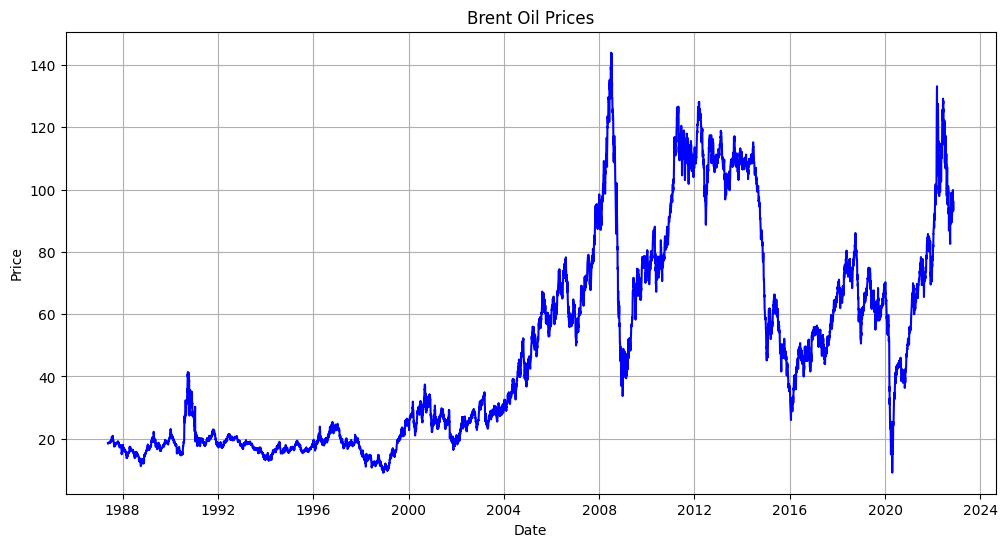

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('BrentOilPricesPro.csv')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plot the oil prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], color='blue')
plt.title('Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In this phase, we ask the LM to look for and download a series of oil prices. In a first answer, the output contains the code to directly download and load the oil prices training data. We have executed the code. We had to modify the code to obtain Yahoo data with the Pandas datareader due to an error. We have added yf.pdr_override() from the yfinance library.

In a second answer, the LM give us the url and the code to load the data.

LMs have the ability to search and find a requested data set and also to define the code to download, load and process it.

# Model definition and execution

Test 2.0 We have a historical series of oil prices. Example of the series. We want a deep learning model with some requirements.

In [ ]:
import os
import openai

# Load your API key
openai.api_key=""

completion = openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You can write and execute Python code by enclosing it in triple backticks, \
    e.g. ```code goes here```. Use this to run the code and execute the model.\
    The user will provide you with a problem and you have to define a machine learning model with those requirements. \
    You have to define and execute the model step by step. Remember that you have to execute the Python code.\
    In a previous step you have downloaded the training data, a series of oil prices. You have the oil prices loaded in a Pandas \
    dataframe. The first column is the date, the second is the price. The data contains 9011 rows, each one corresponds to a the oil price of a day.\
    Write the code to define and train a deep learning model in PyTorch to predict oil prices. The model can be neural networks, RNNs, LSTMSs."},
    {"role": "user", "content":" Please give me the code to define and train a deep learning model to predict oil prices\
    write the code and use PyTorch."}
  ]
)

print(completion.choices[0].message["content"])

Sure! To define and train a deep learning model to predict oil prices using PyTorch, we first need to import the necessary libraries and load the data. Here's an example code that you can use as a starting point:

```python
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

# Load the data
data = pd.read_csv('oil_prices.csv')
prices = data['Price'].values.astype(float)

# Normalize the data
max_price = np.max(prices)
prices /= max_price

# Define the model
class OilPricePredictor(nn.Module):
    def __init__(self):
        super(OilPricePredictor, self).__init__()
        self.hidden_size = 32
        self.lstm = nn.LSTM(1, self.hidden_size)
        self.linear = nn.Linear(self.hidden_size, 1)
        
    def forward(self, inputs):
        lstm_out, _ = self.lstm(inputs)
        predictions = self.linear(lstm_out[-1])
        return predictions

# Prepare the input sequences
sequence_length = 7
input_sequences = []
target_prices = []
for i in range(len(prices) 

We implement the firs part part. Normalize the data, prepare the input sequences and check that input sequences are correct.

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

# Load the data
data = pd.read_csv('BrentOilPricesPro.csv')
prices = data['Price'].values.astype(float)

# Normalize the data
max_price = np.max(prices)
prices /= max_price

# Prepare the input sequences
sequence_length = 7
input_sequences = []
target_prices = []
for i in range(len(prices) - sequence_length):
    seq = prices[i:i+sequence_length]
    target = prices[i+sequence_length]
    input_sequences.append(seq)
    target_prices.append(target)

In [ ]:
print(input_sequences[0]*max_price)
print(target_prices[0]*max_price)

print(input_sequences[1000]*max_price)
print(target_prices[1000]*max_price)
print(input_sequences[1001]*max_price)
print(target_prices[1001]*max_price)

[18.63 18.45 18.55 18.6  18.63 18.6  18.6 ]
18.58
[19.4  19.18 19.78 19.6  19.55 19.6  19.63]
19.95
[19.18 19.78 19.6  19.55 19.6  19.63 19.95]
19.7


In [ ]:
# Define the model
class OilPricePredictor(nn.Module):
    def __init__(self):
        super(OilPricePredictor, self).__init__()
        self.hidden_size = 32
        self.lstm = nn.LSTM(7, self.hidden_size)
        self.linear = nn.Linear(self.hidden_size, 1)

    def forward(self, inputs):
        lstm_out, _ = self.lstm(inputs)
        predictions = self.linear(lstm_out)
        return predictions

# Convert the input sequences and target prices to tensors
input_sequences = torch.tensor(input_sequences, dtype=torch.float32)
target_prices = torch.tensor(target_prices, dtype=torch.float32)

# Create an instance of the model and define the loss function
model = OilPricePredictor()
loss_fn = nn.MSELoss()


# Define the optimizer
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
num_epochs = 300
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(input_sequences.unsqueeze(1))
    loss = loss_fn(outputs, target_prices.unsqueeze(1))
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# Save the trained model
torch.save(model.state_dict(), 'oil_price_predictor.pt')

<ipython-input-56-fd2236b15b16>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_sequences = torch.tensor(input_sequences, dtype=torch.float32)
<ipython-input-56-fd2236b15b16>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target_prices = torch.tensor(target_prices, dtype=torch.float32)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([9004, 1])) that is different to the input size (torch.Size([9004, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 10/300, Loss: 0.07772494107484818
Epoch: 20/300, Loss: 0.058242082595825195
Epoch: 30/300, Loss: 0.055382389575242996
Epoch: 40/300, Loss: 0.05394091084599495
Epoch: 50/300, Loss: 0.05296511948108673
Epoch: 60/300, Loss: 0.052546195685863495
Epoch: 70/300, Loss: 0.05226551741361618
Epoch: 80/300, Loss: 0.052183154970407486
Epoch: 90/300, Loss: 0.05213947221636772
Epoch: 100/300, Loss: 0.05213252454996109
Epoch: 110/300, Loss: 0.052132926881313324
Epoch: 120/300, Loss: 0.052132267504930496
Epoch: 130/300, Loss: 0.052131541073322296
Epoch: 140/300, Loss: 0.05213109031319618
Epoch: 150/300, Loss: 0.05213076248764992
Epoch: 160/300, Loss: 0.05213046446442604
Epoch: 170/300, Loss: 0.05213018134236336
Epoch: 180/300, Loss: 0.05212988704442978
Epoch: 190/300, Loss: 0.0521295890212059
Epoch: 200/300, Loss: 0.05212930589914322
Epoch: 210/300, Loss: 0.05212901532649994
Epoch: 220/300, Loss: 0.05212872847914696
Epoch: 230/300, Loss: 0.052128441631793976
Epoch: 240/300, Loss: 0.052128158509

In [ ]:
# evaluate model:

data=input_sequences[8000:8003]
model.eval()

with torch.no_grad():
    ...
    out_data = model(data.unsqueeze(1))
    out_data=out_data[-1]

    print(out_data*max_price)

In [ ]:
outputs[8900:9004]*max_price

tensor([[[47.6839]],

        [[47.7953]],

        [[47.8536]],

        [[47.8900]],

        [[47.8985]],

        [[47.9428]],

        [[47.7435]],

        [[47.5573]],

        [[47.6166]],

        [[47.7158]],

        [[47.7526]],

        [[47.6502]],

        [[47.9000]],

        [[48.2009]],

        [[48.1486]],

        [[47.9034]],

        [[47.6901]],

        [[48.1806]],

        [[48.3364]],

        [[48.2696]],

        [[48.0141]],

        [[47.6569]],

        [[47.7435]],

        [[47.7598]],

        [[47.9470]],

        [[48.1332]],

        [[48.1524]],

        [[48.1895]],

        [[47.9876]],

        [[47.9779]],

        [[47.9935]],

        [[48.1023]],

        [[48.2402]],

        [[48.3695]],

        [[48.5301]],

        [[48.4727]],

        [[48.3623]],

        [[48.1388]],

        [[48.1600]],

        [[48.1416]],

        [[48.1609]],

        [[48.3739]],

        [[48.6250]],

        [[48.5774]],

        [[48.4448]],

        [[

In this phase we ask the LM to write the code to define and train a deep learning model in PyTorch to predict oil prices. We have specified that we already have the data, that it is in two columns and the size of the data.

The LM has provided the code to load the data, normalize the data, define the model, prepare the input sequences and train the model.

We had to correct some aspects of the model such as including the dimension when instantiating the LSTM and using unsqueez correctly so that the size of the input and output matches what is specified in the PyTorch LSTMs.

In general, it is observed that the model uses the entire sequence of more than 9000 points to train and update the parameters. It doesn't seem like the right strategy. The loss error stabilizes at 0.05 and does not go down.

# Model improvement

In the previous LM response, the model uses the entire sequence of more than 9000 points to train and update the parameters. It doesn't seem like the right strategy. We want a better strategy with shorter training sequence lengths and especially an strategy that fits the data trend well.

In [ ]:
import os
import openai

# Load your API key
openai.api_key=""

completion = openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You can write and execute Python code by enclosing it in triple backticks,\
    e.g. ```code goes here```. Use this to run the code and execute the model.\
    The user will provide you with a problem and you have to define a machine learning model with those requirements.\
    You have to define and execute the model step by step. Remember that you have to execute the Python code.\
    In a previous step you have defined a deep learning model in PyTorch to predict oil prices.\
    The model you defined loads the entire sequence in a tensor and uses the entire sequence of more than 9000 points to train and update the parameters.\
    It does not seem like the right strategy.\
    We want a better strategy with shorter training sequence lengths and especially an strategy that fits the data trend well."},
    {"role": "user", "content":"Please give me the code in PyTorch to train a deep learning model to predict the trend in oil prices\
    write the code and use PyTorch."}
  ]
)

print(completion.choices[0].message["content"])

Sure! Here's an example code to train a deep learning model using PyTorch to predict the trend in oil prices. This code uses a sequence length of 100, meaning it will consider the trend over the last 100 data points to predict the next data point.

```python
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Assuming you have your data in a NumPy array called 'prices'
# prices.shape == (n_samples,)
# prices.dtype == np.float32

# Normalize the prices between 0 and 1
prices = (prices - np.min(prices)) / (np.max(prices) - np.min(prices))

# Define the sequence length
sequence_length = 100

# Divide the prices into sequences of the defined length, with overlapping
sequences = []
targets = []
for i in range(len(prices) - sequence_length):
    sequences.append(prices[i:i+sequence_length])
    targets.append(prices[i+sequence_length])

# Convert the sequences and targets to PyTorch tensors
sequences = torch.FloatTensor(sequences)
targets = torch.FloatTensor(

We use the part of the code corresponding to the training strategy (the batch for loop) in the previous model. As before, we load the data, do a test and then define the model and train it.

Let us remember that the initial data is divided into overlapping sequences of 7. E.g. seq[0]=prices(0:6), target[0]=prices(7)...seq[1]=prices(1:7), target[1]=prices(8). The input data is unsqeezed to fit LSTM input format.



In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

# Load the data
data = pd.read_csv('BrentOilPricesPro.csv')
prices = data['Price'].values.astype(float)

# Normalize the data
max_price = np.max(prices)
prices /= max_price

# Prepare the input sequences
sequence_length = 7
input_sequences = []
target_prices = []
for i in range(len(prices) - sequence_length):
    seq = prices[i:i+sequence_length]
    target = prices[i+sequence_length]
    input_sequences.append(seq)
    target_prices.append(target)

In [ ]:
print(input_sequences[0]*max_price)
print(target_prices[0]*max_price)

print(input_sequences[1000]*max_price)
print(target_prices[1000]*max_price)
print(input_sequences[1001]*max_price)
print(target_prices[1001]*max_price)

print(len(input_sequences))

[18.63 18.45 18.55 18.6  18.63 18.6  18.6 ]
18.58
[19.4  19.18 19.78 19.6  19.55 19.6  19.63]
19.95
[19.18 19.78 19.6  19.55 19.6  19.63 19.95]
19.7
9004


In [ ]:
# Define the model
class OilPricePredictor(nn.Module):
    def __init__(self):
        super(OilPricePredictor, self).__init__()
        self.hidden_size = 32
        self.lstm = nn.LSTM(7, self.hidden_size)
        self.linear = nn.Linear(self.hidden_size, 1)

    def forward(self, inputs):
        lstm_out, _ = self.lstm(inputs)
        predictions = self.linear(lstm_out)
        return predictions

# Convert the input sequences and target prices to tensors
input_sequences = torch.tensor(input_sequences, dtype=torch.float32)
target_prices = torch.tensor(target_prices, dtype=torch.float32)

# Create an instance of the model and define the loss function
model = OilPricePredictor()
loss_fn = nn.MSELoss()


# Define the optimizer
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
num_epochs = 100
batch_size = 100

for epoch in range(num_epochs):
  for i in range(0, len(input_sequences), batch_size):
        # Get mini-batch inputs and targets
        inputs = input_sequences[i:i+batch_size]
        targets_batch = target_prices[i:i+batch_size]
        optimizer.zero_grad()
        outputs = model(inputs.unsqueeze(1))
        loss = loss_fn(outputs, targets_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()

  if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item()}')


# Save the trained model
torch.save(model.state_dict(), 'oil_price_predictor.pt')

<ipython-input-38-34ca592d83a1>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_sequences = torch.tensor(input_sequences, dtype=torch.float32)
<ipython-input-38-34ca592d83a1>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target_prices = torch.tensor(target_prices, dtype=torch.float32)


Epoch: 10/100, Loss: 0.011086228303611279
Epoch: 20/100, Loss: 0.0013652191264554858
Epoch: 30/100, Loss: 0.00035902144736610353
Epoch: 40/100, Loss: 0.0002811101439874619
Epoch: 50/100, Loss: 0.0002491009945515543
Epoch: 60/100, Loss: 0.00022499854094348848
Epoch: 70/100, Loss: 0.00020370517449919134
Epoch: 80/100, Loss: 0.00018693733727559447
Epoch: 90/100, Loss: 0.0001749494840623811
Epoch: 100/100, Loss: 0.0001674091472523287


We evaluate the trained model. We pass it the entire input sequence, calculate the output, and plot it.

In [ ]:
# evaluate model:

model.eval()

with torch.no_grad():
    ...
    outputs1 = model(input_sequences.unsqueeze(1))
    print(outputs1)

tensor([[[0.1421]],

        [[0.1417]],

        [[0.1415]],

        ...,

        [[0.6597]],

        [[0.6596]],

        [[0.6599]]])


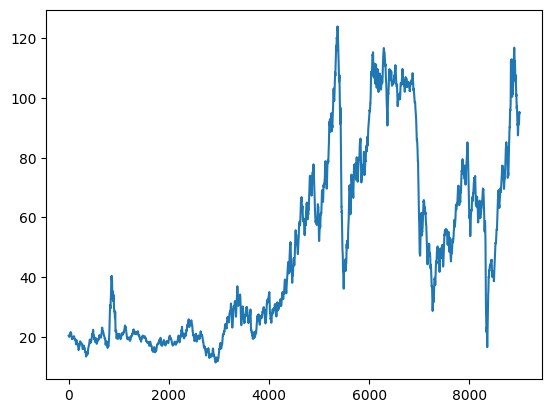

In [ ]:
import matplotlib.pyplot as plt

outputs1=torch.squeeze(outputs1)

plt.plot(outputs1*max_price)

The following conclusions are obtained:

1) Ability to understand the problem and the set the learning strategy. The language model has understood the problem in the previous model and provide us a better strategy with shorter training sequences (batch training) to fit the data trend.

2) Improvement of the model (code, results). The training part of the new model is correct. When we execute the new model we get better results, a loss (mean squared error) of 0.00016 vs 0.05, and we can reproduce the original sequence, as seen in the graph above.

3) Errors in the Python code. Generally, we continue to see that language models have specific errors in parts of the code, such as preparing the appropriate input format for deep learning models (LSTM).